<a href="https://colab.research.google.com/github/jyj1206/BDA_9th_ML1/blob/main/%EA%B3%BC%EC%A0%9C1_Hotel_booking_demand_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [ ]:
# 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# 데이터 불러오기
df = pd.read_csv("hotel_bookings.csv")

In [ ]:
# 데이터 확인
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# 전체 데이터수 출력
data_count = df.shape[0]
data_count

119390

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

> 컬럼 정보 요약
1. Hotel: 호텔 종류 (Resort Hotel 또는 City Hotel)
2. Is_canceled: 예약 취소 여부 (1: 취소, 0: 유지)
3. Lead_time: 예약일과 도착일 사이의 일수
4. Arrival_date_year: 투숙 예정 연도
5. Arrival_date_month: 투숙 예정 월 (예: January, February)
6. Arrival_date_week_number: 투숙 예정 주차 (1~52주)
7. Arrival_date_day_of_month: 투숙 예정일의 날짜
8. Stays_in_weekend_nights: 주말 숙박 일수
9. Stays_in_week_nights: 주중 숙박 일수
10. Adults: 성인 투숙객 수
11. Children: 어린이 투숙객 수
12. Babies: 아기 투숙객 수
13. Meal: 식사 패키지 (BB: 조식, HB: 하프 보드, FB: 풀 보드, SC: 식사 없음)
14. Country: 투숙객 출신 국가 코드 (예: PRT)
15. Market_segment: 시장 세그먼트 (Direct, Corporate, Online TA 등)
16. Distribution_channel: 예약 유통 채널 (Direct, TA/TO 등)
17. Is_repeated_guest: 재방문 여부 (1: 재방문, 0: 첫 방문)
18. Previous_cancellations: 이전 취소된 예약 횟수
19. Previous_bookings_not_canceled: 이전 취소되지 않은 예약 횟수
20. Reserved_room_type: 예약된 방 종류 (A, B, C 등)
21. Assigned_room_type: 배정된 방 종류
22. Booking_changes: 예약 변경 횟수
23. Deposit_type: 보증금 종류 (No Deposit, Non Refund, Refundable)
24. Agent: 예약 진행한 여행사 ID (NULL: 직접 예약)
25. Company: 예약 진행한 회사 ID (NULL: 개인 예약)
26. Days_in_waiting_list: 대기 리스트에 있던 일수
27. Customer_type: 고객 유형 (Transient, Contract, Group 등)
28. ADR (Average Daily Rate): 하루 평균 요금 (총 수익 ÷ 점유 객실 수)
29. Required_car_parking_spaces: 요청된 주차 공간 수
30. Total_of_special_requests: 특별 요청 사항 수 (예: 추가 베개)
31. Reservation_status: 예약 상태 (Canceled, Check-Out, No-Show)
32. Reservation_status_date: 예약 상태가 마지막으로 변경된 날짜

In [ ]:
# 결측치 개수 확인
missing_values = df.isnull().sum()
print(missing_values)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# 수치형 데이터, 범주형 데이터 갯수 확인
numeric_columns = df.drop(columns=['is_canceled']).select_dtypes(include=['float64', 'int64']).columns
object_columns = df.select_dtypes(include=['object']).columns
print("전체 컬럼 수 : ", len(df.columns) - 1)
print("수치형 데이터 컬럼 수 : ", len(numeric_columns))
print("범주형 데이터 컬럼 수 : ", len(object_columns))

전체 컬럼 수 :  31
수치형 데이터 컬럼 수 :  19
범주형 데이터 컬럼 수 :  12


# 전처리 적용

In [ ]:
# 전처리 적용 데이터 복사
processed_df = df.copy()

In [ ]:
## 불필요한 열 제거
useless_col = ['reservation_status']

processed_df.drop(useless_col, axis = 1, inplace = True)

> 목표 변수 : Is_canceled: 예약 취소 여부 (1: 취소, 0: 유지)

> 컬럼 제거 이유
'reservation_status': 목표 변수와 직접 연관이 있어 과적합 가능성 큼.

In [ ]:
## 잘못된 타입 변경 및 결측치 처리
# company 열: 범주형 데이터로 변환 및 결측치는 'Individual'로 채우기
processed_df['company'] = df['company'].fillna('Individual').astype('category')

# agent 열: 범주형 데이터로 변환 및 결측치는 'Unknown'으로 채우기
processed_df['agent'] = df['agent'].fillna('Unknown').astype('category')

# country 열: 결측치는 'Unknown'으로 채우기
processed_df['country'] = df['country'].fillna('Unknown')

# children 열: 결측치는 0으로 채우고, 정수형으로 변환
processed_df['children'] = df['children'].fillna(0).astype(int)

In [ ]:
# 날짜 데이터 처리
processed_df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

processed_df['reservation_date_year'] = processed_df['reservation_status_date'].dt.year.astype('int64')
processed_df['reservation_date_month'] = processed_df['reservation_status_date'].dt.month.astype('category')
processed_df['reservation_date_day'] = processed_df['reservation_status_date'].dt.day.astype('int64')
processed_df = processed_df.drop(['reservation_status_date'] , axis = 1)

In [ ]:
# 결측치 처리 확인
missing_values = processed_df.isnull().sum()
print(missing_values)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# 불필요 컬럼 제거 및 타입 변경 후 수치형 데이터, 범주형 데이터 갯수 확인
numeric_columns = processed_df.drop(columns=['is_canceled']).select_dtypes(include=['float64', 'int64']).columns
categoric_columns = processed_df.select_dtypes(include=['object','category']).columns
print("전체 컬럼 수 : ", len(processed_df.columns) - 1)
print("수치형 데이터 컬럼 수 : ", len(numeric_columns))
print("범주형 데이터 컬럼 수 : ", len(categoric_columns))

전체 컬럼 수 :  32
수치형 데이터 컬럼 수 :  19
범주형 데이터 컬럼 수 :  13


In [ ]:
# 수치형 데이터 컬럼, 범주형 데이터 컬럼 출력
print(f"수치형 데이터 컬럼, {numeric_columns}")
print(f"범주형 데이터 컬럼, {categoric_columns}")

수치형 데이터 컬럼, Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_date_year',
       'reservation_date_day'],
      dtype='object')
범주형 데이터 컬럼, Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type',
       'reservation_date_month'],
      dtype='object')


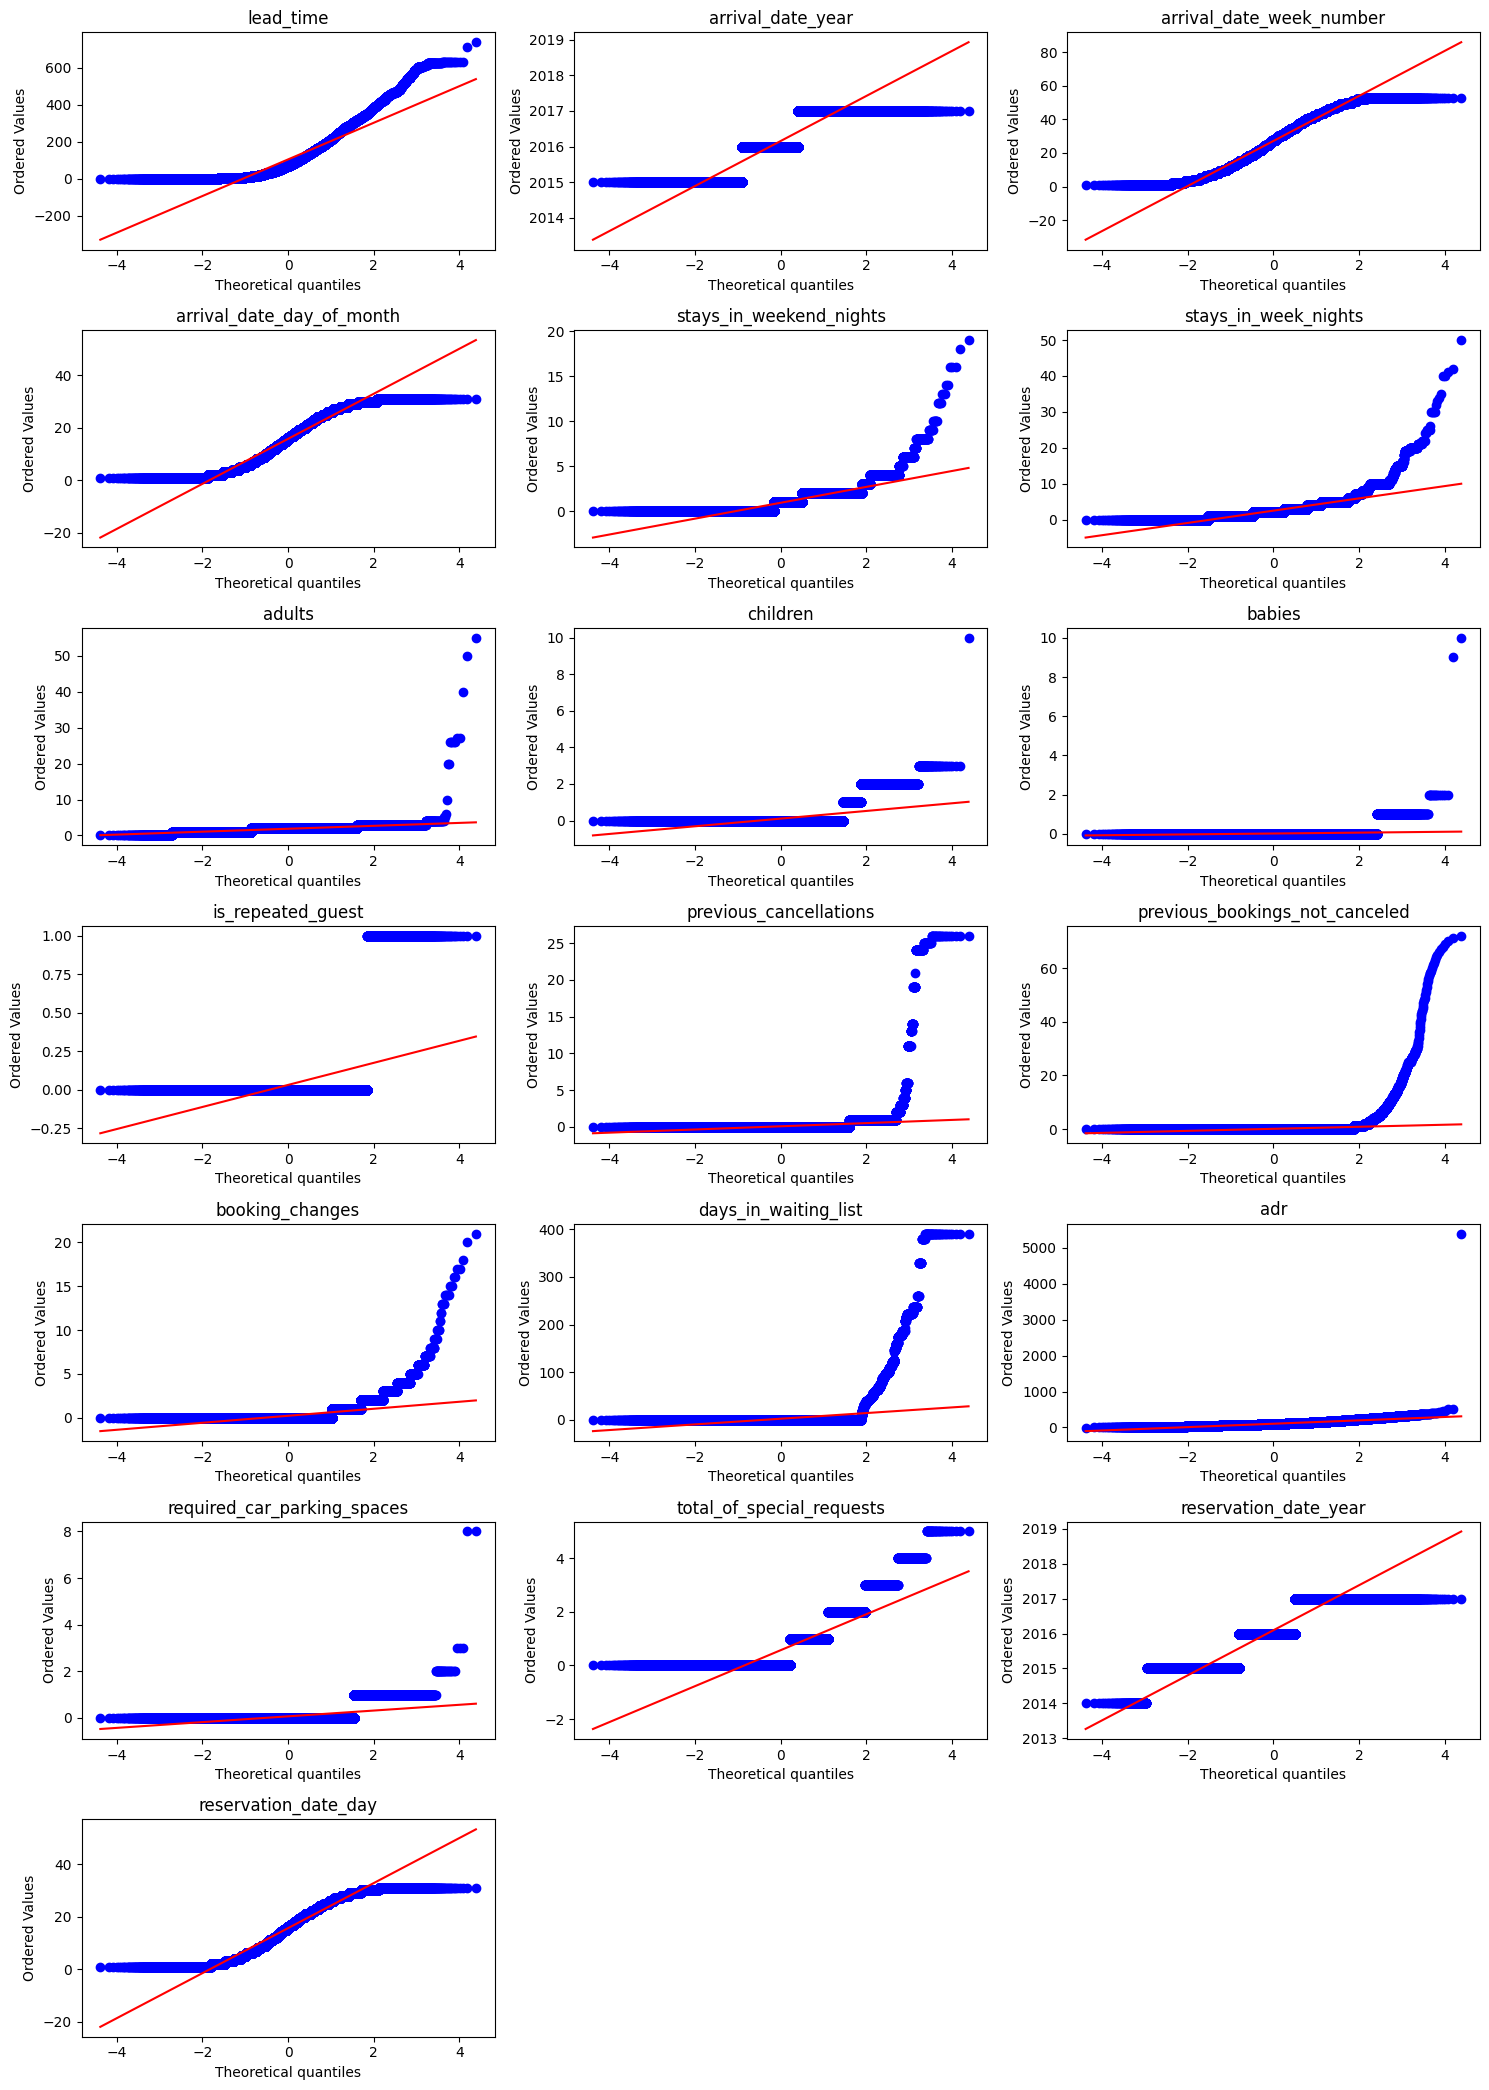

In [ ]:
## 이상치 데이터 처리
#수치형 데이터에 대해 분포 확인
num_cols = 3
num_rows = 7

plt.figure(figsize=(15, num_rows * 3))  # 전체 그래프 크기 설정

# # Q-Q plot 생성
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    stats.probplot(processed_df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'{column}')

# 그래프 전체 출력
plt.tight_layout()  # 레이아웃 정리
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

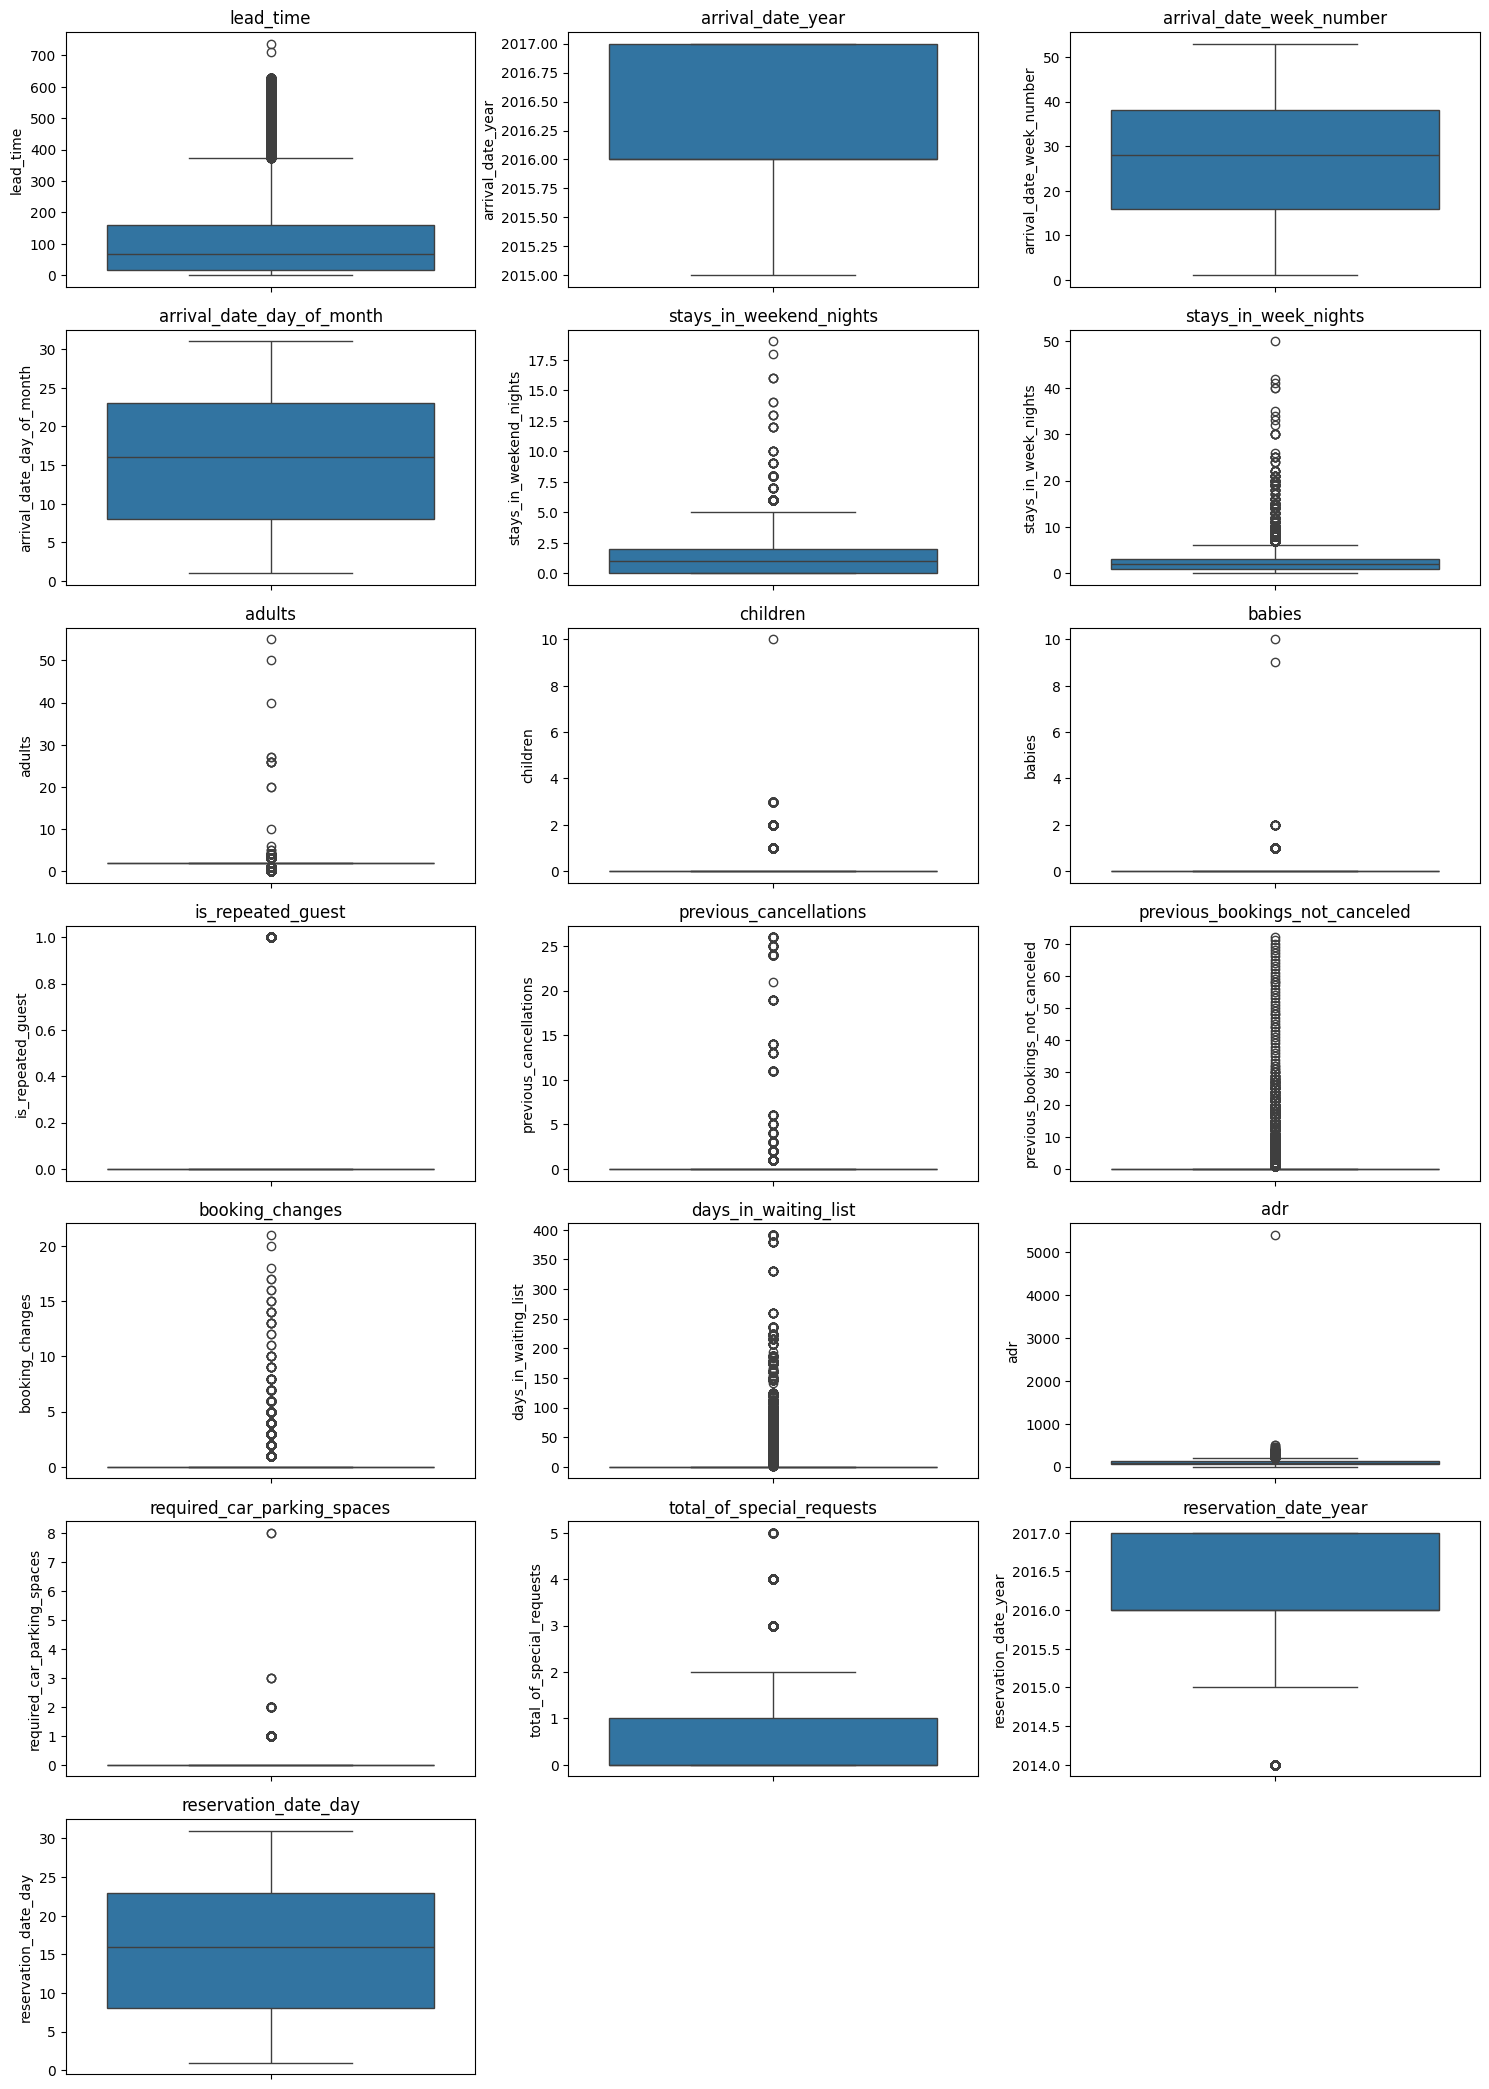

In [ ]:
#Box Plot 생성
plt.figure(figsize=(15, num_rows * 3))  # 전체 그래프 크기 설정

# Box Plot 생성
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=processed_df[column])  # y축에 수치형 데이터 사용
    plt.title(f'{column}')

# 그래프 전체 출력
plt.tight_layout()  # 레이아웃 정리
plt.show()

> 이상치 처리가 필요없는 열들
1. arrival_date_year
2. arrival_date_week_number
3. arrival_date_day_of_month
4. adults
5. children
6. babies
7. is_repeated_guest
8. previous_cancellations
9. previous_bookings_not_canceled
10. days_in_waiting_list
11. reservation_date_year
12. reseraviton_date_day
13. booking_changes

In [ ]:
# 수치형 데이터 이상치 제거
# Z-score 기반 이상치 제거 함수 (정규 분포에 가까운 경우)
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = stats.zscore(df[column].dropna())
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold)
    return df[filtered_entries]

# IQR 기반 이상치 제거 함수 (정규 분포가 아닐 경우)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_entries = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    return df[filtered_entries]

# 정규성에 맞는 컬럼들에 대해 Z-score 적용
zscore_outlier = [
    "lead_time",
    "adr",
    "stays_in_week_nights"
]

for column in zscore_outlier:
    before_count = len(processed_df)  # 제거 전 전체 데이터 수
    prcoessed_df = remove_outliers_zscore(processed_df, column)
    after_count = len(processed_df)  # 제거 후 전체 데이터 수
    removed_outliers = before_count - after_count  # 제거된 이상치 수
    print(f"{column}열 제거 된 이상치 수 : {removed_outliers}")

# 정규성이 아닌 컬럼들에 대해 IQR 적용 (이상치 처리 필요 없는 열 제외)
iqr_outlier = [
    "stays_in_weekend_nights",
    "required_car_parking_spaces",
    "total_of_special_requests"
]

for column in iqr_outlier:
    before_count = len(processed_df)  # 제거 전 전체 데이터 수
    processed_df = remove_outliers_iqr(processed_df, column)
    after_count = len(processed_df)  # 제거 후 전체 데이터 수
    removed_outliers = before_count - after_count  # 제거된 이상치 수
    print(f"{column}열 제거 된 이상치 수 : {removed_outliers}")

lead_time열 제거 된 이상치 수 : 0
adr열 제거 된 이상치 수 : 0
stays_in_week_nights열 제거 된 이상치 수 : 0
stays_in_weekend_nights열 제거 된 이상치 수 : 265
required_car_parking_spaces열 제거 된 이상치 수 : 7409
total_of_special_requests열 제거 된 이상치 수 : 2564


In [ ]:
# 이상치 처리 후 데이터 수
cleaned_data_count = processed_df.shape[0]
print("원본 데이터 수", data_count)
print("이상치 처리 후 데이터 수:", cleaned_data_count)
print("데이터 수 변화:", data_count - cleaned_data_count)

원본 데이터 수 119390
이상치 처리 후 데이터 수: 109152
데이터 수 변화: 10238


In [ ]:
## 범주형 데이터 이상치 제거
# 카테고리별 빈도수 기반 이상치 제거 함수
def remove_outliers_based_on_category(df, column):
    counts = df[column].value_counts()
    low_frequency_categories = counts[counts < 5].index
    df = df[~df[column].isin(low_frequency_categories)]
    return df

# 각 카테고리 컬럼에 대해 이상치 제거
categoric_outlier = [
     'agent', 'company', 'country'
]

# 이상치 제거를 위한 코드 실행
for column in categoric_outlier:
    before_count = len(processed_df)  # 제거 전 전체 데이터 수
    processed_df = remove_outliers_based_on_category(processed_df, column)
    after_count = len(processed_df)  # 제거 후 전체 데이터 수
    removed_outliers = before_count - after_count  # 제거된 이상치 수
    print(f"{column}열 제거 된 이상치 수 : {removed_outliers}")

agent열 제거 된 이상치 수 : 160
company열 제거 된 이상치 수 : 345
country열 제거 된 이상치 수 : 118


In [ ]:
# 이상치 처리 후 데이터 수
cleaned_data_count_category = processed_df.shape[0]

print("원본 데이터 수", data_count)
print("이상치 처리 후 데이터 수:", cleaned_data_count_category)
print("데이터 수 변화:", cleaned_data_count - cleaned_data_count_category)

원본 데이터 수 119390
이상치 처리 후 데이터 수: 108529
데이터 수 변화: 623


In [ ]:
## 원 핫 인코딩 적용
# 범주형 데이터
processed_df = pd.get_dummies(processed_df, columns=categoric_columns)

In [ ]:
# 입력값과 레이블 구분
X = processed_df.drop(['is_canceled'], axis=1).copy()
y = processed_df['is_canceled']

In [ ]:
# 전처리 이후 데이터 수와 컬럼 개수 출력
print("전처리 이후 데이터 수:", X.shape[0])
print("전처리 이후 컬럼 개수:", X.shape[1])

전처리 이후 데이터 수: 108529
전처리 이후 컬럼 개수: 893


# Feature Selection

In [ ]:
# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 수치형 데이터 표준화
scaler = StandardScaler()

# 수치형 데이터 컬럼만 가져오기
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [ ]:
# PCA 적용
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca.shape

(86823, 49)

# 모델링

In [ ]:
# 모델과 평가지표 정의
models = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42)
]

metrics = ['accuracy', 'precision', 'recall', 'f1']

names = [
    'LogisticRegression',
    'KNeighborsClassifier',
    'RandomForestClassifier',
    'GradientBoostingClassifier',
    'AdaBoostClassifier'
]

In [ ]:
# StratifiedKFold 객체 생성
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 결과를 저장할 리스트 생성
results = []

# 각 모델에 대해 교차 검증 실행
for i, (model, name) in enumerate(zip(models, names)):
    print(f"사용 알고리즘 {i+1}/{len(names)}: {name}")

    # 교차 검증 실행
    scores = cross_validate(model, X_train_pca, y_train, cv=skf, scoring=metrics)

    print(scores)
    print("-" * 60 + "\n")

사용 알고리즘 1/5: LogisticRegression
{'fit_time': array([0.40282536, 0.36618829, 0.37258863, 0.36847925, 0.37622786]), 'score_time': array([0.04846454, 0.0477612 , 0.04839706, 0.05242205, 0.06471014]), 'test_accuracy': array([0.82130723, 0.82084653, 0.82130723, 0.81283114, 0.81899332]), 'test_precision': array([0.82282737, 0.82599081, 0.82534305, 0.80528926, 0.8208678 ]), 'test_recall': array([0.70492512, 0.69930876, 0.7016129 , 0.7016129 , 0.70017281]), 'test_f1': array([0.75932677, 0.75738907, 0.75846501, 0.74988456, 0.75573172])}
------------------------------------------------------------

사용 알고리즘 2/5: KNeighborsClassifier
{'fit_time': array([0.02620482, 0.0276947 , 0.01704121, 0.01711869, 0.01644588]), 'score_time': array([ 9.35320902,  9.08661699,  9.98379016, 10.01928425,  8.49037123]), 'test_accuracy': array([0.89513389, 0.89605528, 0.89709185, 0.89933195, 0.89328496]), 'test_precision': array([0.91806757, 0.92102245, 0.92084217, 0.92066062, 0.91518512]), 'test_recall': array([0.810

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

{'fit_time': array([35.68890572, 34.75739884, 35.72698045, 35.58307028, 34.77148461]), 'score_time': array([0.14264441, 0.13562751, 0.13101506, 0.14817905, 0.13415432]), 'test_accuracy': array([0.8924273 , 0.89093003, 0.88263749, 0.88913845, 0.89034785]), 'test_precision': array([0.88902514, 0.89330218, 0.88304185, 0.88804701, 0.8887689 ]), 'test_recall': array([0.83525346, 0.82589286, 0.81437212, 0.82704493, 0.8296371 ]), 'test_f1': array([0.86130086, 0.85827597, 0.84731795, 0.85646111, 0.85818561])}
------------------------------------------------------------



# 최종 모델 학습 및 테스트

In [ ]:
# 교차 검증 후 모델 테스트 데이터 평가
for model, name in zip(models, names):
    print(f"사용 알고리즘: {name}")
    # 모델 학습
    model.fit(X_train_pca, y_train)

    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test_pca)

    # 성능 평가 지표 출력
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"테스트 데이터 평가 결과 - {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 60 + "\n")

사용 알고리즘: LogisticRegression
테스트 데이터 평가 결과 - LogisticRegression:
Accuracy: 0.8139
Precision: 0.8172
Recall: 0.6950
F1 Score: 0.7511
------------------------------------------------------------

사용 알고리즘: KNeighborsClassifier
테스트 데이터 평가 결과 - KNeighborsClassifier:
Accuracy: 0.8990
Precision: 0.9234
Recall: 0.8179
F1 Score: 0.8674
------------------------------------------------------------

사용 알고리즘: RandomForestClassifier
테스트 데이터 평가 결과 - RandomForestClassifier:
Accuracy: 0.9675
Precision: 0.9959
Recall: 0.9233
F1 Score: 0.9582
------------------------------------------------------------

사용 알고리즘: GradientBoostingClassifier
테스트 데이터 평가 결과 - GradientBoostingClassifier:
Accuracy: 0.9237
Precision: 0.9677
Recall: 0.8393
F1 Score: 0.8989
------------------------------------------------------------

사용 알고리즘: AdaBoostClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


테스트 데이터 평가 결과 - AdaBoostClassifier:
Accuracy: 0.8870
Precision: 0.8897
Recall: 0.8223
F1 Score: 0.8547
------------------------------------------------------------

